Michael Higgins, Sierra Wilde

# $$\text{Lab 7:}$$

In [2]:
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Problem 1

In this section I am just reading in the files and storing them as Pandas DataFrames. higgs_table is for the Higgs Data and qcd_table is for the QCD data.

In [3]:
hf = h5py.File('higgs_100000_pt_250_500.h5','r')
hf1 = h5py.File('qcd_100000_pt_250_500.h5','r')

In [4]:
higgs_data = np.array(hf.get('higgs_100000_pt_250_500'))
qcd_data = np.array(hf1.get('qcd_100000_pt_250_500'))

In [5]:
higgs_table = pd.DataFrame(higgs_data)
qcd_table = pd.DataFrame(qcd_data)

In [6]:
higgs_table.columns = [ 'pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR']

In [19]:
qcd_table.columns = [ 'pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR']

Below is a plot of my normalized mass histograms stacked over each other. The blue is my qcd data and the orange is my higgs data. I did the normalization in my matplotlib.pyplot function where I chose to make 100 bins just so the resolution of certain mass features in the histogram are visible. Then I set each of those bins such that the number of counts in each bin have weights such that the integral under the qcd histogram is 20,000 and the integral under the Higgs histogram is 100.

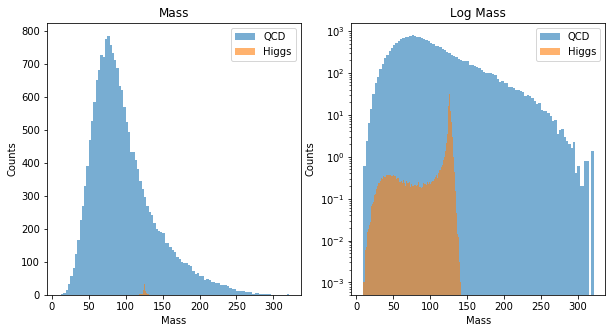

In [665]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].set_title('Mass')
ax[0].hist(qcd_table['mass'],alpha=.6,bins=100,weights = 20000*np.ones(len(qcd_table['mass']))/len(qcd_table['mass']) , label = 'QCD')
ax[0].hist(higgs_table['mass'],alpha=.6,bins=100,weights = 100*np.ones(len(higgs_table['mass']))/len(higgs_table['mass']) , label = 'Higgs')
ax[0].set_ylabel('Counts')
ax[0].set_xlabel('Mass')
ax[0].legend()

ax[1].set_title('Log Mass')
ax[1].hist(qcd_table['mass'],alpha=.6,bins=100,weights = 20000*np.ones(len(qcd_table['mass']))/len(qcd_table['mass']) , label = 'QCD')
ax[1].hist(higgs_table['mass'],alpha=.6,bins=100,weights = 100*np.ones(len(higgs_table['mass']))/len(higgs_table['mass']) , label = 'Higgs')
ax[1].set_yscale('log')
ax[1].set_ylabel('Counts')
ax[1].set_xlabel('Mass')
ax[1].legend();

Using Poisson statistics for a significance calculation means I find the probability I get 20100 counts with a background of 20000 counts. I do this by integrating under the Poisson distribution with a mean of 20000 and find what the area under the curve greater than 20100 is. I then convert this to a normal distribution sigma to find the significance.

In [652]:
probability = stats.poisson.sf(20100,20000)
print('The probability of getting 20100 counts is {0}'.format(probability))

The probability of getting 20100 counts is 0.23847212190687442


In [653]:
sig = stats.norm.isf(0.23847212190687442)
print('This corresponds to a significance of {0}'.format(sig))

This corresponds to a significance of 0.7112259282313185


Using $\frac{N_{higgs}}{\sqrt{N_{qcd}}}$ gives me a significance of 0.7071067811865475

In [663]:
dif =  1 -((100/np.sqrt(20000)) /sig)
print('These two ways of finding significance yield very similar results only differing only by {0} percent from each other.'.format(dif))

These two ways of finding significance yield very similar results only differing only by 0.0057916154083619276 percent from each other.


## Problem 2:

Looking at the histogram in problem 1 I can find the max mass of the higgs data where it first drops below 1 count in my histogram and cut all data larger than this value to get rid of a lot of qcd background, thus increasing significance. I find this value to be 133.

In [25]:
histo00 = np.histogram(np.array(higgs_table['mass'])[mass_cut_higgs1],np.arange(higgs_table['mass'].min(),higgs_table['mass'].max(),(higgs_table['mass'].max()-higgs_table['mass'].min())/200),weights =(100*np.ones(len(np.array(higgs_table['mass'])[mass_cut_higgs1]))/len(higgs_table['mass'])))
histo100 = np.histogram(np.array(qcd_table['mass'])[mass_cut_qcd1],np.arange(qcd_table['mass'].min(),qcd_table['mass'].max(),(qcd_table['mass'].max()-qcd_table['mass'].min())/200),weights=(20000*np.ones(len(np.array(qcd_table['mass'])[mass_cut_qcd1]))/len(qcd_table['mass'])))
mass_cut_higgs1 = np.where((higgs_table['mass']<133))
mass_cut_qcd1 = np.where((qcd_table['mass']<133)
histo_higgs1 = np.array([histo00[0],histo00[1][:-1]])
histo_qcd1 = np.array([histo100[0],histo100[1][:-1]])

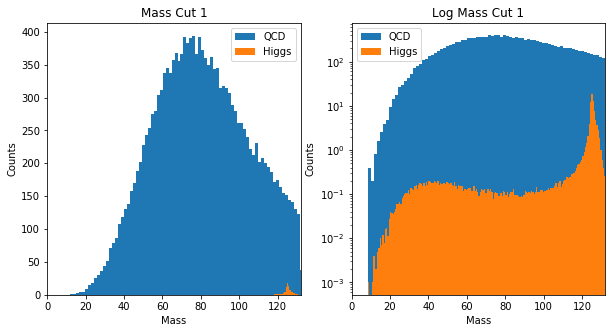

In [666]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].set_title('Mass Cut 1')
ax[0].bar(histo_qcd1[1],histo_qcd1[0],width=(qcd_table['mass'].max()-qcd_table['mass'].min())/200, label = 'QCD')
ax[0].bar(histo_higgs1[1],histo_higgs1[0], width=(higgs_table['mass'].max()-higgs_table['mass'].min())/200, label = 'Higgs')
ax[0].set_xlim(0,132)
ax[0].set_ylabel('Counts')
ax[0].set_xlabel('Mass')
ax[0].legend()

ax[1].set_title('Log Mass Cut 1')
ax[1].bar(histo_qcd1[1],histo_qcd1[0],width=(qcd_table['mass'].max()-qcd_table['mass'].min())/200, label = 'QCD')
ax[1].bar(histo_higgs1[1],histo_higgs1[0], width=(higgs_table['mass'].max()-higgs_table['mass'].min())/200, label = 'Higgs')
ax[1].set_xlim(0,132)
ax[1].set_yscale('log')
ax[1].set_ylabel('Counts')
ax[1].set_xlabel('Mass')
ax[1].legend();


In [27]:
#Signifigance
histo_higgs1[0].sum() / np.sqrt(histo_qcd1[0].sum())

0.7791712032418447

With this first cut my significance increases from 0.7071067811865475 to 0.7791712032418447

For my second cut I have the goal to remove a significant amount of data points where the background dominates over the higgs data. I chose to additionally cut any values of mass less than 199 which is where my normalized histogram has it's lowest counts near the distinct peak around 127.

In [24]:
mass_cut_higgs = np.where((higgs_table['mass']<133)&(higgs_table['mass']>119))
mass_cut_qcd = np.where((qcd_table['mass']<133)&(qcd_table['mass']>119))
    
histo = np.histogram(np.array(higgs_table['mass'])[mass_cut_higgs],np.arange(higgs_table['mass'].min(),higgs_table['mass'].max(),(higgs_table['mass'].max()-higgs_table['mass'].min())/200),weights =(100*np.ones(len(np.array(higgs_table['mass'])[mass_cut_higgs]))/len(higgs_table['mass'])))
histo1 = np.histogram(np.array(qcd_table['mass'])[mass_cut_qcd],np.arange(qcd_table['mass'].min(),qcd_table['mass'].max(),(qcd_table['mass'].max()-qcd_table['mass'].min())/200),weights=(20000*np.ones(len(np.array(qcd_table['mass'])[mass_cut_qcd]))/len(qcd_table['mass'])))

histo_higgs = np.array([histo[0],histo[1][:-1]])
histo_qcd = np.array([histo1[0],histo1[1][:-1]])

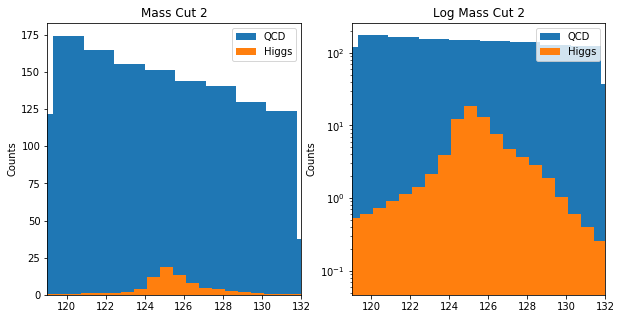

In [668]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].set_title('Mass Cut 2')
ax[0].bar(histo_qcd[1],histo_qcd[0],width=(qcd_table['mass'].max()-qcd_table['mass'].min())/200, label = 'QCD')
ax[0].bar(histo_higgs[1],histo_higgs[0], width=(higgs_table['mass'].max()-higgs_table['mass'].min())/200, label = 'Higgs')
ax[0].set_xlim(119,132)
ax[0].set_ylabel('Counts')
ax[0].legend()

ax[1].set_title('Log Mass Cut 2')
ax[1].bar(histo_qcd[1],histo_qcd[0],width=(qcd_table['mass'].max()-qcd_table['mass'].min())/200, label = 'QCD')
ax[1].bar(histo_higgs[1],histo_higgs[0], width=(higgs_table['mass'].max()-higgs_table['mass'].min())/200, label = 'Higgs')
ax[1].set_xlim(119,132)
ax[1].set_yscale('log')
ax[1].set_ylabel('Counts')
ax[1].legend();


In [30]:
#Signifigance
histo_higgs[0].sum() / np.sqrt(histo_qcd[0].sum())

2.145899758751475

This cut increased my significance to 2.145899758751475. I choose to stop making cuts based on mass here because I dont want to risk injecting my own bias into these cuts too much. Ideally I want to remove all of the places that aren't the exact mass of the higgs boson, but each sub-jet is important and we are trying to find what the mass is.

## Problem 3:

In [32]:
def normalizedhistogram(x):
    histo = np.histogram(higgs_table[x],np.arange(higgs_table[x].min(),higgs_table[x].max(),(higgs_table[x].max()-higgs_table[x].min())/200),weights =(100*np.ones(len(higgs_table[x]))/len(higgs_table[x])))
    histo1 = np.histogram(qcd_table[x],np.arange(qcd_table[x].min(),qcd_table[x].max(),(qcd_table[x].max()-qcd_table[x].min())/200),weights=(20000*np.ones(len(qcd_table[x]))/len(qcd_table[x])))

    histo_higgs = np.array([histo[0],histo[1][:-1]])
    histo_qcd = np.array([histo1[0],histo1[1][:-1]])
    
    return [histo_higgs,histo_qcd]

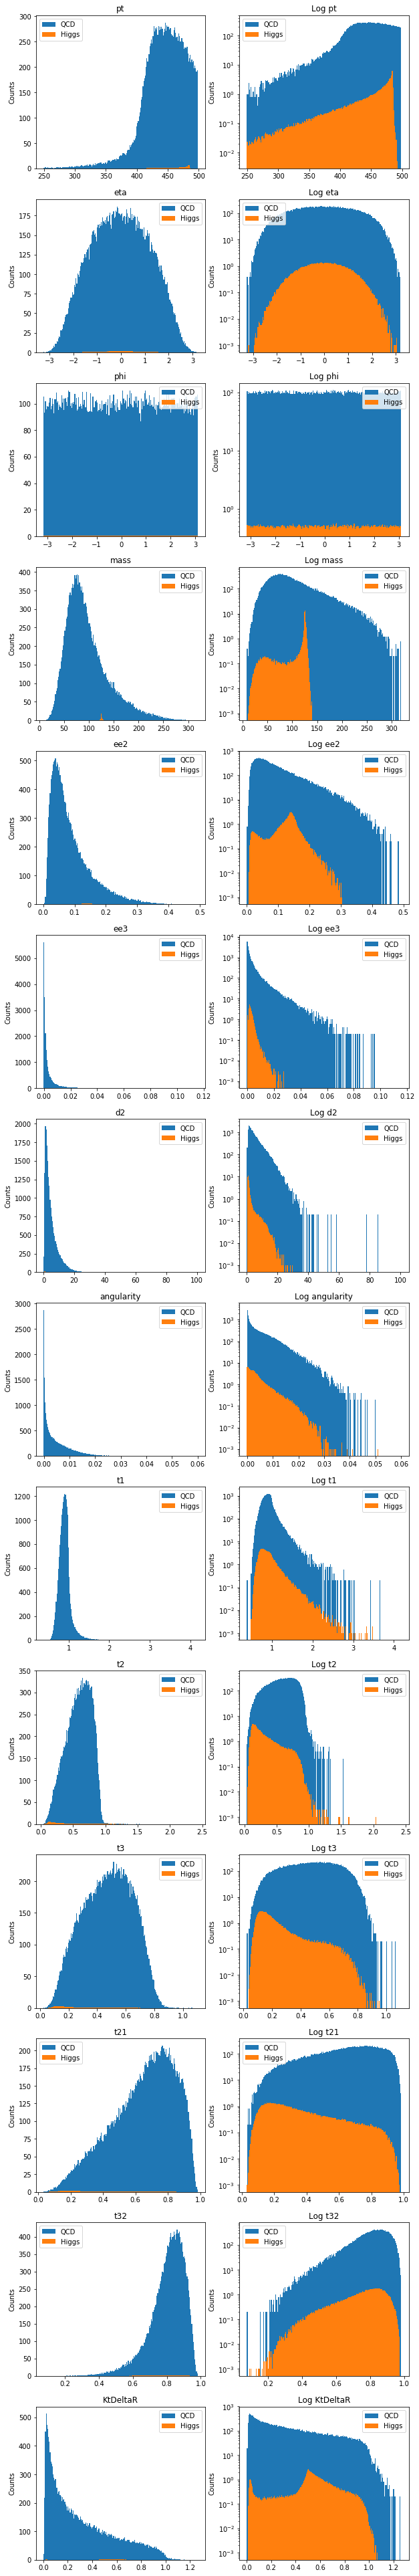

In [667]:
fig,ax = plt.subplots(len(higgs_table.columns),2,figsize=(10,70))

for i in np.arange(0,len(higgs_table.columns)):
    ax[i][0].set_title('{:s}'.format(higgs_table.columns[i]))
    ax[i][0].bar(normalizedhistogram(higgs_table.columns[i])[1][1],normalizedhistogram(higgs_table.columns[i])[1][0],width=(qcd_table[higgs_table.columns[i]].max()-qcd_table[higgs_table.columns[i]].min())/200, label = 'QCD')
    ax[i][0].bar(normalizedhistogram(higgs_table.columns[i])[0][1],normalizedhistogram(higgs_table.columns[i])[0][0],width=(higgs_table[higgs_table.columns[i]].max()-higgs_table[higgs_table.columns[i]].min())/200, label = 'Higgs')
    ax[i][0].set_ylabel('Counts')
    ax[i][0].legend()

    ax[i][1].set_title('Log {:s}'.format(higgs_table.columns[i]))
    ax[i][1].bar(normalizedhistogram(higgs_table.columns[i])[1][1],normalizedhistogram(higgs_table.columns[i])[1][0],width=(qcd_table[higgs_table.columns[i]].max()-qcd_table[higgs_table.columns[i]].min())/200, label = 'QCD')
    ax[i][1].bar(normalizedhistogram(higgs_table.columns[i])[0][1],normalizedhistogram(higgs_table.columns[i])[0][0],width=(higgs_table[higgs_table.columns[i]].max()-higgs_table[higgs_table.columns[i]].min())/200, label = 'Higgs')
    ax[i][1].set_yscale('log')
    ax[i][1].set_ylabel('Counts')
    ax[i][1].legend();

In [35]:
normalizedhistogram('mass')[1][1],normalizedhistogram('mass')[0][1]

(array([  9.29281733,  10.85334321,  12.41386909,  13.97439497,
         15.53492085,  17.09544673,  18.65597261,  20.21649849,
         21.77702437,  23.33755025,  24.89807613,  26.45860201,
         28.01912789,  29.57965377,  31.14017964,  32.70070552,
         34.2612314 ,  35.82175728,  37.38228316,  38.94280904,
         40.50333492,  42.0638608 ,  43.62438668,  45.18491256,
         46.74543844,  48.30596432,  49.8664902 ,  51.42701608,
         52.98754196,  54.54806783,  56.10859371,  57.66911959,
         59.22964547,  60.79017135,  62.35069723,  63.91122311,
         65.47174899,  67.03227487,  68.59280075,  70.15332663,
         71.71385251,  73.27437839,  74.83490427,  76.39543015,
         77.95595602,  79.5164819 ,  81.07700778,  82.63753366,
         84.19805954,  85.75858542,  87.3191113 ,  88.87963718,
         90.44016306,  92.00068894,  93.56121482,  95.1217407 ,
         96.68226658,  98.24279246,  99.80331834, 101.36384421,
        102.92437009, 104.48489597, 106.

I do not see any cuts that could make a higher signifigance compared to my mass cut. This may be because I made a rather agressive cut for my mass data where I also cut the back end of the tail on my mass data to isolate the large peak at about 127. The only other cut I can make that gets a comparable signifigance is if I cut the KtDeltaR data to isolate the peak at 0.5. I will not do this because there is also a peak near 0 so I don't think it would accurately represent the data to remove values between those two peaks.

In [20]:
def normalizedhistogrammasscuts(x):
    mass_cut_higgs = np.where((higgs_table['mass']<133)&(higgs_table['mass']>119))
    mass_cut_qcd = np.where((qcd_table['mass']<133)&(qcd_table['mass']>119))
    
    histo = np.histogram(np.array(higgs_table[x])[mass_cut_higgs],np.arange(higgs_table[x].min(),higgs_table[x].max(),(higgs_table[x].max()-higgs_table[x].min())/200),weights =(100*np.ones(len(np.array(higgs_table[x])[mass_cut_higgs]))/len(higgs_table[x])))
    histo1 = np.histogram(np.array(qcd_table[x])[mass_cut_qcd],np.arange(qcd_table[x].min(),qcd_table[x].max(),(qcd_table[x].max()-qcd_table[x].min())/200),weights=(20000*np.ones(len(np.array(qcd_table[x])[mass_cut_qcd]))/len(qcd_table[x])))

    histo_higgs = np.array([histo[0],histo[1][:-1]])
    histo_qcd = np.array([histo1[0],histo1[1][:-1]])
    
    return [histo_higgs,histo_qcd]

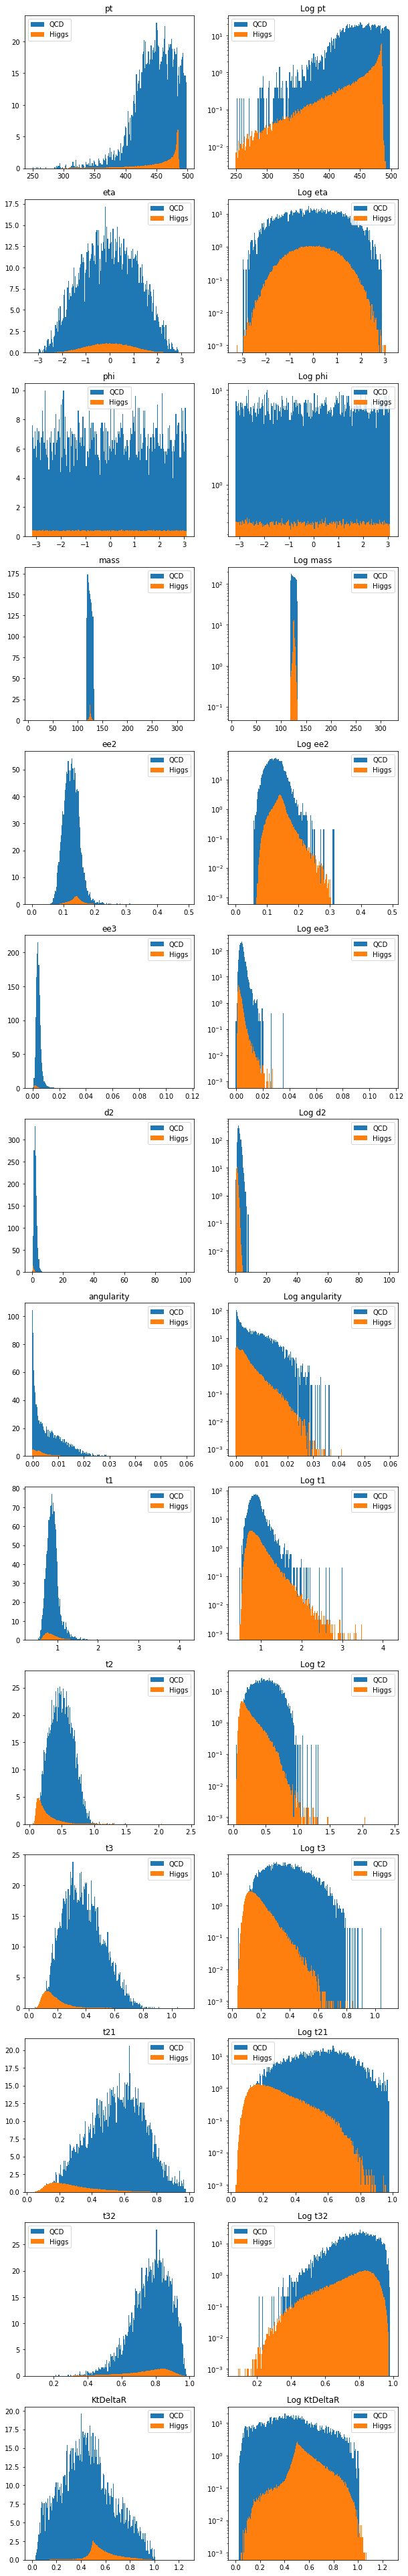

In [88]:
fig,ax = plt.subplots(len(higgs_table.columns),2,figsize=(10,70))

for i in np.arange(0,len(higgs_table.columns)):
    ax[i][0].set_title('{:s}'.format(higgs_table.columns[i]))
    ax[i][0].bar(normalizedhistogrammasscuts(higgs_table.columns[i])[1][1],normalizedhistogrammasscuts(higgs_table.columns[i])[1][0],width=(qcd_table[higgs_table.columns[i]].max()-qcd_table[higgs_table.columns[i]].min())/200, label = 'QCD')
    ax[i][0].bar(normalizedhistogrammasscuts(higgs_table.columns[i])[0][1],normalizedhistogrammasscuts(higgs_table.columns[i])[0][0],width=(higgs_table[higgs_table.columns[i]].max()-higgs_table[higgs_table.columns[i]].min())/200, label = 'Higgs')
    ax[i][0].legend()

    ax[i][1].set_title('Log {:s}'.format(higgs_table.columns[i]))
    ax[i][1].bar(normalizedhistogrammasscuts(higgs_table.columns[i])[1][1],normalizedhistogrammasscuts(higgs_table.columns[i])[1][0],width=(qcd_table[higgs_table.columns[i]].max()-qcd_table[higgs_table.columns[i]].min())/200, label = 'QCD')
    ax[i][1].bar(normalizedhistogrammasscuts(higgs_table.columns[i])[0][1],normalizedhistogrammasscuts(higgs_table.columns[i])[0][0],width=(higgs_table[higgs_table.columns[i]].max()-higgs_table[higgs_table.columns[i]].min())/200, label = 'Higgs')
    ax[i][1].set_yscale('log')
    ax[i][1].legend();

After my optimal mass cut I can see quite a few places where I can get rid of background where there is no higgs data. Any place where I can discriminate where there is background but no higgs data in the particular parameter are places I can make additional cuts. This is because if there is a cut with only background data in that variable then that can translate to possibly increasing the expected signifigance a decent amount. These features are pt values greater than 492, d2 values greater than 4.5, t3 values greater than 0.3, and t21 values greater than 0.2. These are all locations where there is either no higgs data(pt) or a very small about of higgs data compared to background(t3,t21). For these reasons I will cut them from the data. I can not use phi data to make any cuts because it appears phi is independent from mass and has no effect on increasing the significance of mass.

In [26]:
normalizedhistogrammasscuts('pt')[0][np.where(normalizedhistogrammasscuts('pt')[1]== normalizedhistogrammasscuts('pt')[1].max())]

array([491.76419007])

# Problem 4

In [636]:
def finalcut(x):
    mass_cut_higgs = np.where((higgs_table['mass']<133)&(higgs_table['mass']>120)&(higgs_table['pt']<492)&(higgs_table['t3']<0.3)&(higgs_table['t21']<0.2))
    mass_cut_qcd = np.where((qcd_table['mass']<133)&(qcd_table['mass']>120)&(qcd_table['pt']<492)&(qcd_table['t3']<0.3)&(qcd_table['t21']<0.2))

    histo = np.histogram(np.array(higgs_table[x])[mass_cut_higgs],np.arange(qcd_table[x].min(),qcd_table[x].max(),(qcd_table[x].max()-qcd_table[x].min())/250),weights =(100*np.ones(len(np.array(higgs_table[x])[mass_cut_higgs]))/len(higgs_table[x])))
    histo1 = np.histogram(np.array(qcd_table[x])[mass_cut_qcd],np.arange(qcd_table[x].min(),qcd_table[x].max(),(qcd_table[x].max()-qcd_table[x].min())/250),weights=(20000*np.ones(len(np.array(qcd_table[x])[mass_cut_qcd]))/len(qcd_table[x])))

    histo_higgs = np.array([histo[0],histo[1][:-1]])
    histo_qcd = np.array([histo1[0],histo1[1][:-1]])
    
    mass = [histo_higgs,histo_qcd]
    return mass

In [637]:
final_mass_cut = finalcut('mass')

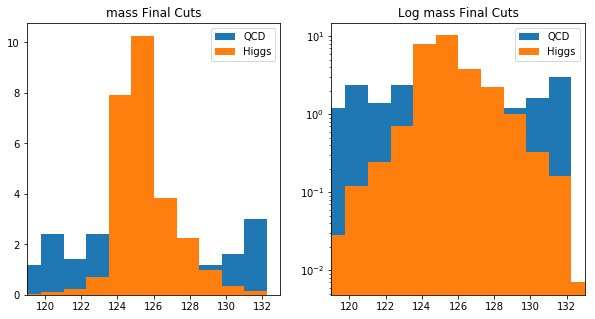

In [605]:
fig,ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title('{:s} Final Cuts'.format('mass'))
ax[0].bar(final_mass_cut[1][1],final_mass_cut[1][0],width=(qcd_table['mass'].max()-qcd_table['mass'].min())/250, label = 'QCD')
ax[0].bar(final_mass_cut[0][1],final_mass_cut[0][0],width=(qcd_table['mass'].max()-qcd_table['mass'].min())/250, label = 'Higgs')
ax[0].set_xlim(119,133)
ax[0].legend()

ax[1].set_title('Log {:s} Final Cuts'.format('mass'))
ax[1].bar(final_mass_cut[1][1],final_mass_cut[1][0],width=(qcd_table['mass'].max()-qcd_table['mass'].min())/250, label = 'QCD')
ax[1].bar(final_mass_cut[0][1],final_mass_cut[0][0],width=(qcd_table['mass'].max()-qcd_table['mass'].min())/250, label = 'Higgs')
ax[1].set_yscale('log')
ax[1].set_xlim(119,133)
ax[1].legend();

In [670]:
print('My significance after event selection from problem 3 is {0}'.format(final_mass_cut[0][0].sum()/np.sqrt(final_mass_cut[1][0].sum())))

My significance after event selection from problem 3 is 6.135633732721589


Just using my identifications in problem 3 were enough to give me an expected significance above 5 sigma. In my plot of higgs data and qcd data after event selection we can see that the background is now lower in counts compared to the higgs signal. I increased my significance from 0.707 to 6.13. This essentially means that I have a 5 sigma probability of getting counts reflective of my signal compared to a background with these cuts that I made.

# $$\text{Lab 8}$$

# Problem 1

Here I am just reading in the high and low luminosity data and storing them in Pandas Dataframes as highlumi_table and lowlumi_table.


In [8]:
hf_highlumi = h5py.File('data_highLumi_pt_250_500.h5','r')
hf_lowlumi = h5py.File('data_lowLumi_pt_250_500.h5','r')

In [9]:
highlumi_data = np.array(hf_highlumi.get('data/block0_values'))
lowlumi_data = np.array(hf_lowlumi.get('data/block0_values'))

In [10]:
highlumi_table = pd.DataFrame(highlumi_data)
lowlumi_table = pd.DataFrame(lowlumi_data)

In [11]:
highlumi_table.columns = [ 'pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR']
lowlumi_table.columns = [ 'pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR']

In [12]:
lowlumi_table

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,499.974801,-0.340430,-3.124063,35.763836,0.016922,0.000061,12.505765,0.003937,1.181578,0.797111,0.724045,0.674615,0.908337,0.026663
1,470.525978,1.447995,-0.463162,79.069978,0.052447,0.000801,5.549873,0.000965,0.924677,0.752034,0.679503,0.813294,0.903554,0.136669
2,455.009985,-1.672870,-2.260314,56.401982,0.030301,0.000229,8.234025,0.000417,0.892902,0.630183,0.538919,0.705769,0.855178,0.106421
3,387.414081,-1.002107,-2.688377,77.412447,0.092790,0.001888,2.363279,0.002206,0.975771,0.461347,0.338407,0.472803,0.733519,0.324391
4,442.472789,-1.103515,-2.367580,86.479013,0.049532,0.000909,7.483889,0.002174,0.782566,0.668635,0.432825,0.854414,0.647326,0.041830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4055,485.528722,1.349769,1.178191,101.540846,0.093551,0.002513,3.069102,0.002492,1.006359,0.811150,0.664146,0.806025,0.818770,0.164820
4056,472.231371,1.874326,-0.785502,48.174004,0.025348,0.000161,9.860763,0.000308,1.036714,0.918382,0.721017,0.885858,0.785095,0.038309
4057,407.594270,0.494450,-1.839265,67.141046,0.061750,0.000890,3.778698,0.003875,0.957798,0.730431,0.548445,0.762615,0.750852,0.298864
4058,417.108347,-1.391452,-0.368711,126.643493,0.163618,0.007312,1.669434,0.001432,1.184487,0.673570,0.573632,0.568659,0.851630,0.373660


In [13]:
highlumi_table

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,491.273762,0.885859,-1.607844,58.540714,0.027848,0.000236,10.916629,0.002658,0.723524,0.576035,0.451149,0.796152,0.783197,0.105238
1,443.077741,-0.850850,-1.808610,109.261432,0.111414,0.003361,2.430250,0.003674,1.081477,0.488437,0.431396,0.451639,0.883217,0.254729
2,487.700656,-0.848095,3.101697,80.398065,0.059299,0.000973,4.666474,0.004545,0.885087,0.637212,0.476032,0.719942,0.747054,0.231983
3,474.234962,1.501633,-1.656456,90.085535,0.061264,0.001368,5.948416,0.001163,1.354343,0.698983,0.668163,0.516104,0.955908,0.096045
4,485.597724,1.021424,1.742641,119.889999,0.133209,0.003223,1.363644,0.001526,0.905440,0.354629,0.219775,0.391665,0.619733,0.406962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40339,463.278465,1.715067,-2.254925,79.321004,0.066043,0.001196,4.150582,0.000477,0.837033,0.602315,0.573286,0.719583,0.951804,0.266005
40340,418.496927,-2.246578,1.679789,44.635757,0.030060,0.000199,7.316158,0.000066,0.922342,0.801027,0.579431,0.868470,0.723360,0.037072
40341,474.840070,-0.981801,3.135062,55.302586,0.031332,0.000290,9.421780,0.003184,0.814772,0.695005,0.503360,0.853005,0.724255,0.102287
40342,460.901330,0.764519,-0.736565,72.333900,0.037743,0.000560,10.421032,0.005506,0.910557,0.675996,0.491189,0.742398,0.726616,0.059109


Below I am creating a function to normalize my luminosity histograms and a total histogram of the higgs data and the qcd data combined. The total expected normalized histogram returns a histogram normalized to 20100 counts and consistent to the higgs and qcd data added together. The luminosity histogram is also normalized to 20100 counts to match the expected.

In [436]:
def normalizedlumihistogram(x):
    histo = np.histogram(highlumi_table[x],np.arange(qcd_table[x].min(),qcd_table[x].max(),(qcd_table[x].max()-qcd_table[x].min())/250),weights =(20100*np.ones(len(highlumi_table[x]))/len(highlumi_table[x])))
    histo1 = np.histogram(lowlumi_table[x],np.arange(qcd_table[x].min(),qcd_table[x].max(),(qcd_table[x].max()-qcd_table[x].min())/250),weights=(20100*np.ones(len(lowlumi_table[x]))/len(lowlumi_table[x])))

    histo_highlumi = np.array([histo[0],histo[1][:-1]])
    histo_lowlumi = np.array([histo1[0],histo1[1][:-1]])
    
    return [histo_highlumi,histo_lowlumi]

def normalizedtotalhistogram(x):
    histo = np.histogram(higgs_table[x],np.arange(qcd_table[x].min(),qcd_table[x].max(),(qcd_table[x].max()-qcd_table[x].min())/250),weights =(100*np.ones(len(higgs_table[x]))/len(higgs_table[x])))
    histo1 = np.histogram(qcd_table[x],np.arange(qcd_table[x].min(),qcd_table[x].max(),(qcd_table[x].max()-qcd_table[x].min())/250),weights=(20000*np.ones(len(qcd_table[x]))/len(qcd_table[x])))

    histo_higgs = np.array([histo[0],histo[1][:-1]])
    histo_qcd = np.array([histo1[0],histo1[1][:-1]])
    
    histo_tot = np.array([histo[0]+histo1[0],histo[1][:-1]])
    
    return [histo_tot]

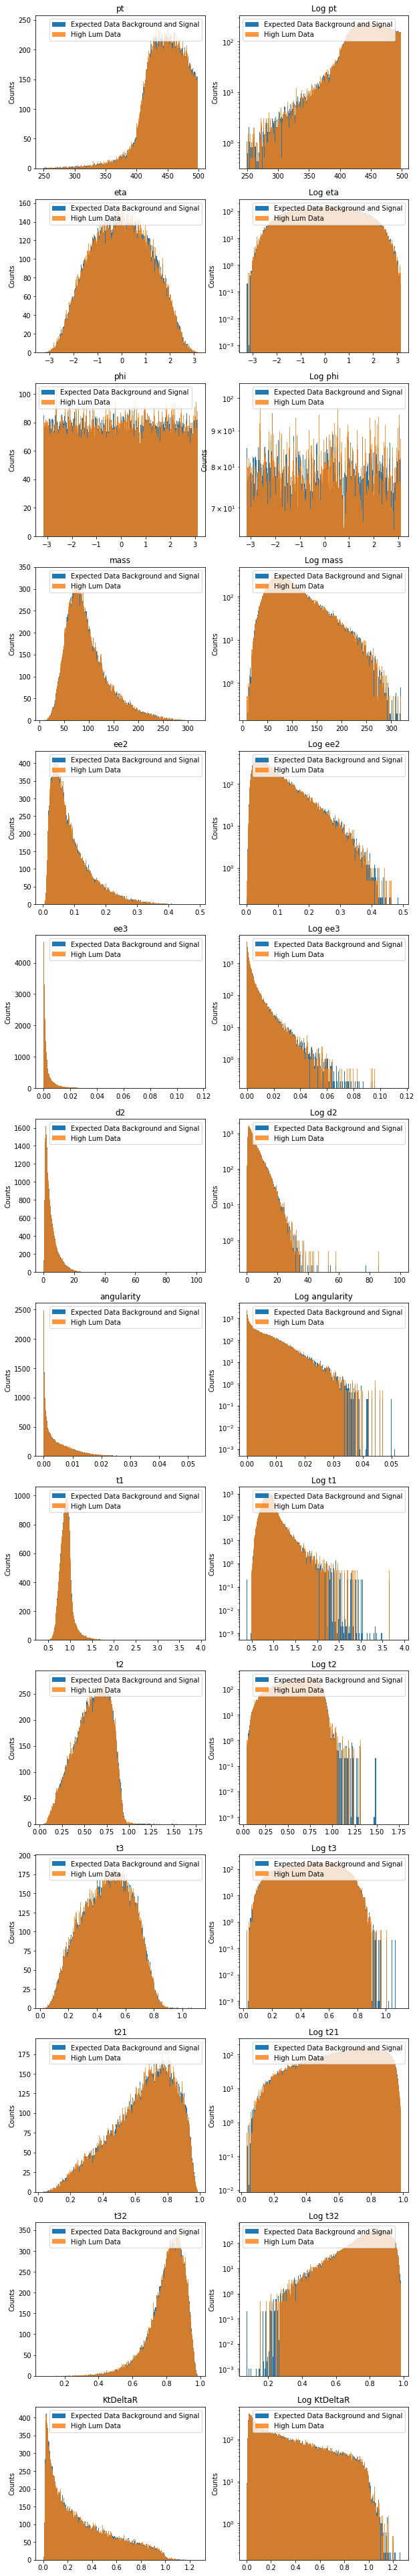

In [671]:
fig,ax = plt.subplots(len(highlumi_table.columns),2,figsize=(10,70))

for i in np.arange(0,len(highlumi_table.columns)):
    ax[i][0].set_title('{:s}'.format(highlumi_table.columns[i]))
    ax[i][0].bar(normalizedtotalhistogram(higgs_table.columns[i])[0][1],normalizedtotalhistogram(higgs_table.columns[i])[0][0],width=(qcd_table[higgs_table.columns[i]].max()-qcd_table[higgs_table.columns[i]].min())/250, label = 'Expected Data Background and Signal')
    ax[i][0].bar(normalizedlumihistogram(highlumi_table.columns[i])[0][1],normalizedlumihistogram(highlumi_table.columns[i])[0][0],width=(qcd_table[highlumi_table.columns[i]].max()-qcd_table[highlumi_table.columns[i]].min())/250,alpha=.8, label = 'High Lum Data')
    ax[i][0].set_ylabel('Counts')
    ax[i][0].legend()

    ax[i][1].set_title('Log {:s}'.format(highlumi_table.columns[i]))
    ax[i][1].bar(normalizedtotalhistogram(higgs_table.columns[i])[0][1],normalizedtotalhistogram(higgs_table.columns[i])[0][0],width=(qcd_table[higgs_table.columns[i]].max()-qcd_table[higgs_table.columns[i]].min())/250, label = 'Expected Data Background and Signal')
    ax[i][1].bar(normalizedlumihistogram(highlumi_table.columns[i])[0][1],normalizedlumihistogram(highlumi_table.columns[i])[0][0],width=(qcd_table[highlumi_table.columns[i]].max()-qcd_table[highlumi_table.columns[i]].min())/250,alpha=.8, label = 'High Lum Data')
    ax[i][1].set_yscale('log')
    ax[i][1].set_ylabel('Counts')
    ax[i][1].legend();

Above we can see that the simulated data and the experimental data yield nearly identical data even in the log plot. 

Below I create functions that use my optimal event selection cuts from lab 7 to directly cut the higgs and qcd data and then turn what is left into a histogram such that each count is weighted such that if there were no cuts the sum would be 20100. I do the same with the high and low luminosity.

In [639]:
def finaltotcut(x):
    mass_cut_higgs = np.where((higgs_table['mass']<133)&(higgs_table['mass']>120)&(higgs_table['pt']<492)&(higgs_table['t3']<0.3)&(higgs_table['t21']<0.2))
    mass_cut_qcd = np.where((qcd_table['mass']<133)&(qcd_table['mass']>120)&(qcd_table['pt']<492)&(qcd_table['t3']<0.3)&(qcd_table['t21']<0.2))
    
    histo = np.histogram(np.array(higgs_table[x])[mass_cut_higgs],np.arange(qcd_table[x].min(),qcd_table[x].max(),(qcd_table[x].max()-qcd_table[x].min())/250),weights =(100*np.ones(len(np.array(higgs_table[x])[mass_cut_higgs]))/len(higgs_table[x])))
    histo1 = np.histogram(np.array(qcd_table[x])[mass_cut_qcd],np.arange(qcd_table[x].min(),qcd_table[x].max(),(qcd_table[x].max()-qcd_table[x].min())/250),weights=(20000*np.ones(len(np.array(qcd_table[x])[mass_cut_qcd]))/len(qcd_table[x])))

    histo_higgs = np.array([histo[0],histo[1][:-1]])
    histo_qcd = np.array([histo1[0],histo1[1][:-1]])
    
    total = [np.array([histo[0]+histo1[0],histo1[1][:-1]])]
    return total

def finallumicut(x):
    mass_cut_highlumi = np.where((highlumi_table['mass']<133)&(highlumi_table['mass']>120)&(highlumi_table['pt']<492)&(highlumi_table['t3']<0.3)&(highlumi_table['t21']<0.2))
    mass_cut_lowlum = np.where((lowlumi_table['mass']<133)&(lowlumi_table['mass']>120)&(lowlumi_table['pt']<492)&(lowlumi_table['t3']<0.3)&(lowlumi_table['t21']<0.2))
    
    histo = np.histogram(np.array(highlumi_table[x])[mass_cut_highlumi],np.arange(qcd_table[x].min(),qcd_table[x].max(),(qcd_table[x].max()-qcd_table[x].min())/250),weights =(20100*np.ones(len(np.array(highlumi_table[x])[mass_cut_highlumi]))/len(highlumi_table[x])))
    histo11 = np.histogram(np.array(lowlumi_table[x])[mass_cut_lowlum],np.arange(qcd_table[x].min(),qcd_table[x].max(),(qcd_table[x].max()-qcd_table[x].min())/250),weights=(20100*np.ones(len(np.array(lowlumi_table[x])[mass_cut_lowlum]))/len(lowlumi_table[x])))

    histo_highlumi = np.array([histo[0],histo[1][:-1]])
    histo_lowlumi = np.array([histo11[0],histo11[1][:-1]])
    
    final = [histo_highlumi,histo_lowlumi]
    return final

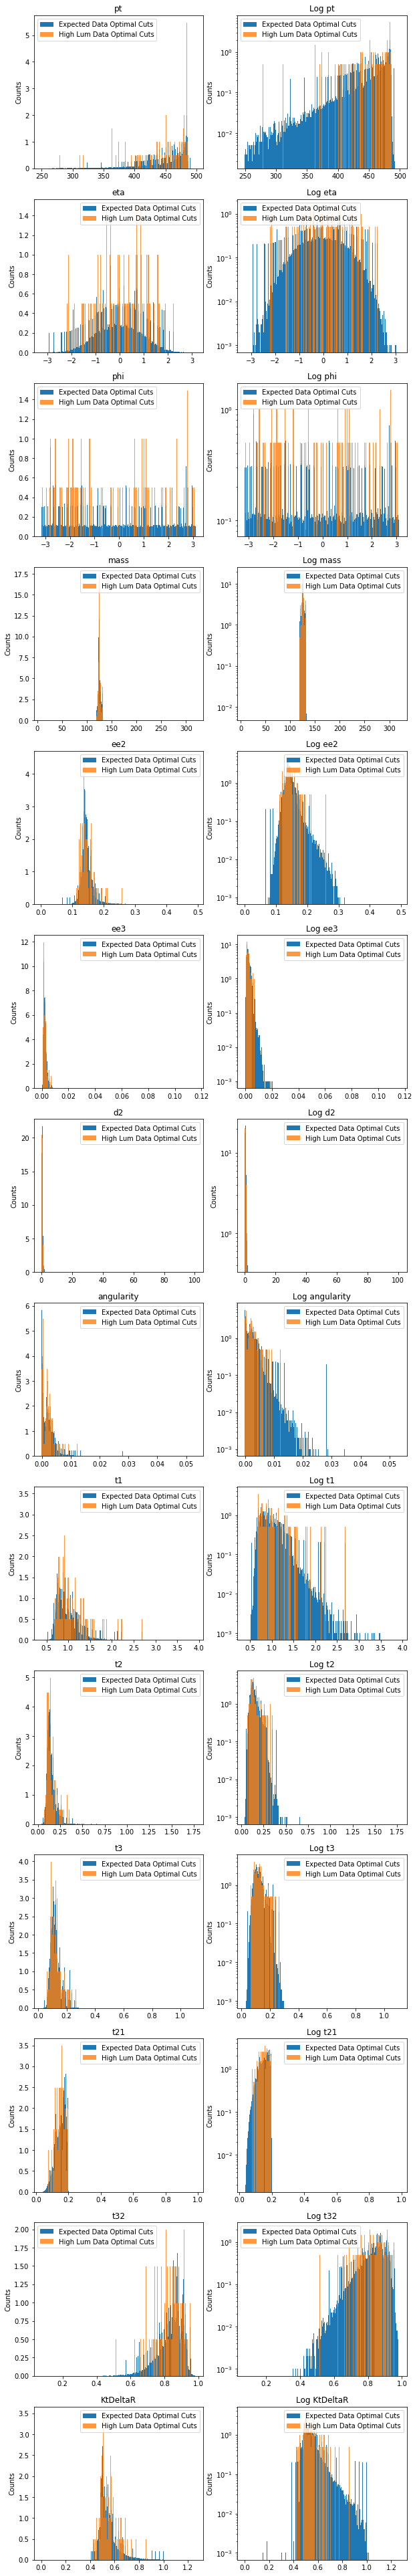

In [672]:
fig,ax = plt.subplots(len(highlumi_table.columns),2,figsize=(10,70))

for i in np.arange(0,len(highlumi_table.columns)):
    ax[i][0].set_title('{:s}'.format(highlumi_table.columns[i]))
    ax[i][0].bar(finaltotcut(higgs_table.columns[i])[0][1],finaltotcut(higgs_table.columns[i])[0][0],width=(qcd_table[higgs_table.columns[i]].max()-qcd_table[higgs_table.columns[i]].min())/250, label = 'Expected Data Optimal Cuts')
    ax[i][0].bar(finallumicut(highlumi_table.columns[i])[0][1],finallumicut(highlumi_table.columns[i])[0][0],width=(qcd_table[highlumi_table.columns[i]].max()-qcd_table[highlumi_table.columns[i]].min())/250,alpha=.8, label = 'High Lum Data Optimal Cuts')
    ax[i][0].set_ylabel('Counts')
    ax[i][0].legend()

    ax[i][1].set_title('Log {:s}'.format(highlumi_table.columns[i]))
    ax[i][1].bar(finaltotcut(higgs_table.columns[i])[0][1],finaltotcut(higgs_table.columns[i])[0][0],width=(qcd_table[higgs_table.columns[i]].max()-qcd_table[higgs_table.columns[i]].min())/250, label = 'Expected Data Optimal Cuts')
    ax[i][1].bar(finallumicut(highlumi_table.columns[i])[0][1],finallumicut(highlumi_table.columns[i])[0][0],width=(qcd_table[highlumi_table.columns[i]].max()-qcd_table[highlumi_table.columns[i]].min())/250,alpha=.8, label = 'High Lum Data Optimal Cuts')
    ax[i][1].set_yscale('log')
    ax[i][1].set_ylabel('Counts')
    ax[i][1].legend();

In [673]:
highlumsig = ((finallumicut('mass')[0][0]-finalcut('mass')[1][0])).sum()/np.sqrt(finalcut('mass')[1][0].sum())
print('The significance of my high luminosity data is {0}'.format(highlumsig))

The significance of my high luminosity data is 5.965063039329701


In order to find my high luminosity significance I took my high luminosity data after the event selection and subtracted the qcd background after the mass cut to get my high luminosity backgroundless data. I then divided the area under that histogram by the square root of the qcd background counts after the event selection.

My expected significance from lab 7 was 6.14 but I got 5.97 for my hig lum data. In the perfect world I would get the exact same significance, but these values are both above 5 sigma and very close to eachother. This suggest that the high luminosity data behaves a lot like the simulated data expected.

# Problem 2

Since I used functions in problem 1 I am re using them for problem 2 witht he eact same process, but using the low luminosity data.

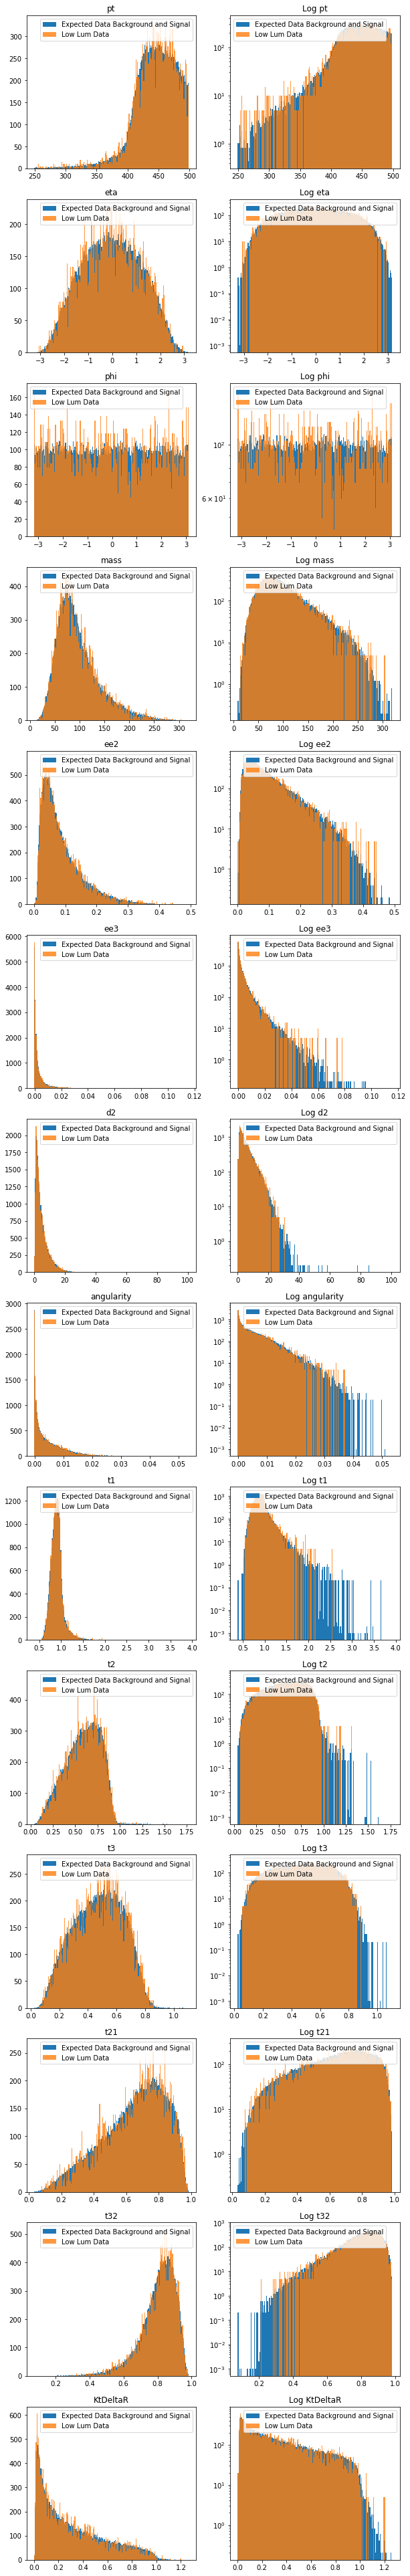

In [130]:
fig,ax = plt.subplots(len(highlumi_table.columns),2,figsize=(10,70))

for i in np.arange(0,len(highlumi_table.columns)):
    ax[i][0].set_title('{:s}'.format(highlumi_table.columns[i]))
    ax[i][0].bar(normalizedtotalhistogram(higgs_table.columns[i])[0][1],normalizedtotalhistogram(higgs_table.columns[i])[0][0],width=(qcd_table[higgs_table.columns[i]].max()-qcd_table[higgs_table.columns[i]].min())/250, label = 'Expected Data Background and Signal')
    ax[i][0].bar(normalizedlumihistogram(highlumi_table.columns[i])[1][1],normalizedlumihistogram(highlumi_table.columns[i])[1][0],width=(qcd_table[highlumi_table.columns[i]].max()-qcd_table[lowlumi_table.columns[i]].min())/250,alpha=.8, label = 'Low Lum Data')
    ax[i][0].legend()

    ax[i][1].set_title('Log {:s}'.format(highlumi_table.columns[i]))
    ax[i][1].bar(normalizedtotalhistogram(higgs_table.columns[i])[0][1],normalizedtotalhistogram(higgs_table.columns[i])[0][0],width=(qcd_table[higgs_table.columns[i]].max()-qcd_table[higgs_table.columns[i]].min())/250, label = 'Expected Data Background and Signal')
    ax[i][1].bar(normalizedlumihistogram(lowlumi_table.columns[i])[1][1],normalizedlumihistogram(lowlumi_table.columns[i])[1][0],width=(qcd_table[lowlumi_table.columns[i]].max()-qcd_table[lowlumi_table.columns[i]].min())/250,alpha=.8, label = 'Low Lum Data')
    ax[i][1].set_yscale('log')
    ax[i][1].legend();

Above we can see that the simulated data and the experimental data yield very similar data, but the low luminosity data does not fit the simulated data as well as the high luminosity data. This is apparent in the deviations of counts.

Below I apply the functions from problem 1.

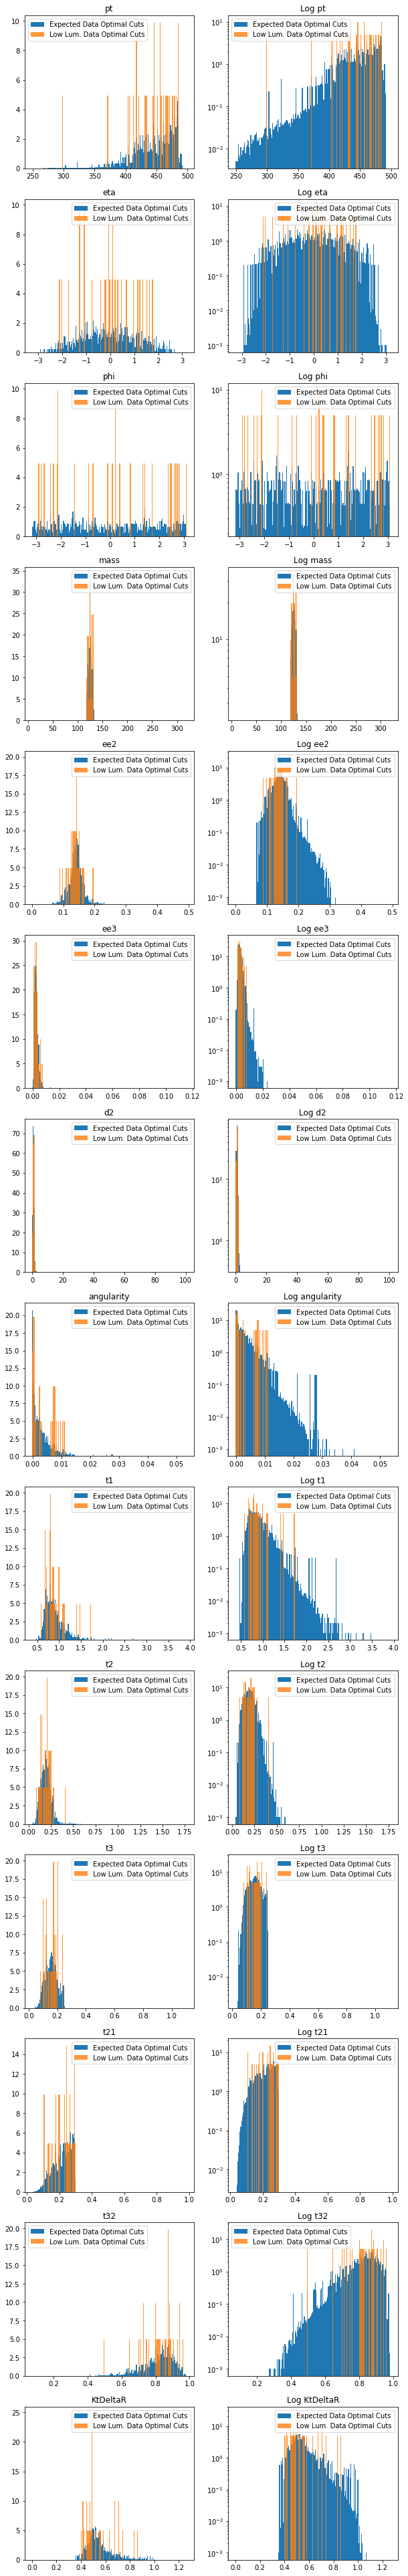

In [277]:
fig,ax = plt.subplots(len(highlumi_table.columns),2,figsize=(10,70))

for i in np.arange(0,len(highlumi_table.columns)):
    ax[i][0].set_title('{:s}'.format(highlumi_table.columns[i]))
    ax[i][0].bar(finaltotcut(higgs_table.columns[i])[0][1],finaltotcut(higgs_table.columns[i])[0][0],width=(qcd_table[higgs_table.columns[i]].max()-qcd_table[higgs_table.columns[i]].min())/250, label = 'Expected Data Optimal Cuts')
    ax[i][0].bar(finallumicut(highlumi_table.columns[i])[1][1],finallumicut(highlumi_table.columns[i])[1][0],width=(qcd_table[highlumi_table.columns[i]].max()-qcd_table[highlumi_table.columns[i]].min())/250,alpha=.8, label = 'Low Lum. Data Optimal Cuts')
    ax[i][0].legend()

    ax[i][1].set_title('Log {:s}'.format(highlumi_table.columns[i]))
    ax[i][1].bar(finaltotcut(higgs_table.columns[i])[0][1],finaltotcut(higgs_table.columns[i])[0][0],width=(qcd_table[higgs_table.columns[i]].max()-qcd_table[higgs_table.columns[i]].min())/250, label = 'Expected Data Optimal Cuts')
    ax[i][1].bar(finallumicut(highlumi_table.columns[i])[1][1],finallumicut(highlumi_table.columns[i])[1][0],width=(qcd_table[highlumi_table.columns[i]].max()-qcd_table[highlumi_table.columns[i]].min())/250,alpha=.8, label = 'Low Lum. Data Optimal Cuts')
    ax[i][1].set_yscale('log')
    ax[i][1].legend();

In [674]:
lowlumsig = (finallumicut('mass')[1][0].sum()-finalcut('mass')[1][0].sum())/np.sqrt(finalcut('mass')[1][0].sum())
print('The significance of my high luminosity data is {0}'.format(lowlumsig))

The significance of my high luminosity data is 4.656990809132607


In order to find my low luminosity significance I took my low luminosity data after the event selection and subtracted the qcd background after the mass cut to get my low luminosity backgroundless data. I then divided the area under that histogram by the square root of the qcd background counts after the event selection.

My expected significance from lab 7 was 6.14 but I got 4.7 for my low luminosity data. In the perfect world I would get the exact same significance, but these values are not both above 5 sigma. This suggest that the low luminosity data behaves less like the simulated data expected compared to the high luminosity data. The low luminosity data would not be able to claim a 5 sigma significance since the background is too large relative to the low luminosity data.

# Problem 3

In [676]:
print('My significance for my Low Luminosity data after event selection is {0} sigma'.format(lowlumsig))

My significance for my Low Luminosity data after event selection is 4.656990809132607 sigma


Below I use numpy.quantile to determine what value of mass corresponds to mean and 95% confidence upper bound of my higgs data after event selection. This yields my expected higgs boson mass and expected 95% confidence upper bound on it.

In [679]:
expect = np.quantile(np.array(higgs_table['mass'])[np.where((higgs_table['mass']<133)&(higgs_table['mass']>120)&(higgs_table['pt']<492)&(higgs_table['t3']<0.3)&(higgs_table['t21']<0.2))],[.5,.95])
print('My expected 95% confidence upper bound on the Higgs boson mass is {0}'.format(expect[1]))

My expected 95% confidence upper bound on the Higgs boson mass is 129.24220798454877


Below I use numpy.quantile to determine what value of mass corresponds to mean and 95% confidence upper bound of my low luminosity data after event selection. This yields my expected less than 5 sigma significance higgs boson mass and expected 95% confidence upper bound on it.

In [682]:
lowobserved = np.quantile(np.array(lowlumi_table['mass'])[np.where((lowlumi_table['mass']<133)&(lowlumi_table['mass']>120)&(lowlumi_table['pt']<492)&(lowlumi_table['t3']<0.3)&(lowlumi_table['t21']<0.2))],[.5,.95])
print('My observed 95% confidence upper bound on the Higgs boson mass is {0}'.format(lowobserved[1]))

My observed 95% confidence upper bound on the Higgs boson mass is 132.0408726803397


The upper bound on my expected data is smaller than the upper bound on my observed data. However, they have essentially the same mean of expected mean = 125.8 and observed mean = 125.9. This just means the the low luminosity data has a larger range than the expected data on the mass of the higgs boson.

In [683]:
expect[0],lowobserved[0]

(125.79830485080349, 125.9042677977749)